<a href="https://colab.research.google.com/github/Marktito/projectwork/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [128]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cvs_dataset.csv')

In [129]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [131]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [132]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

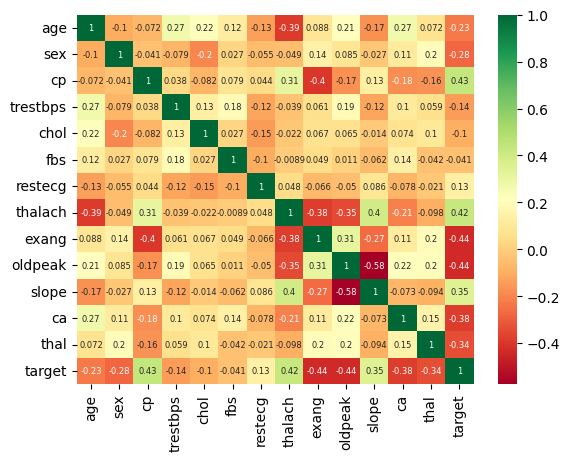

In [133]:
sns.heatmap(df.corr(), cmap="RdYlGn", annot=True, annot_kws={"size" : 6})

In [134]:
x = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']       

In [135]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 100)

<Axes: xlabel='target', ylabel='Count'>

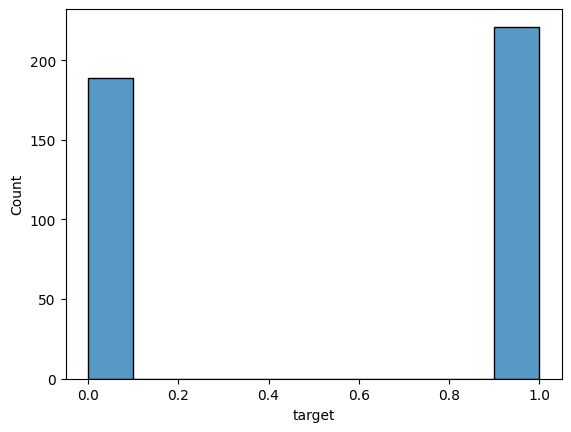

In [136]:
sns.histplot(y_test)

Accuracy: 0.9926829268292683
Precision: 1.0
Recall: 0.9864253393665159
F1 Score: 0.9931662870159453
AUC: 0.9932126696832579
Confusion Matrix:


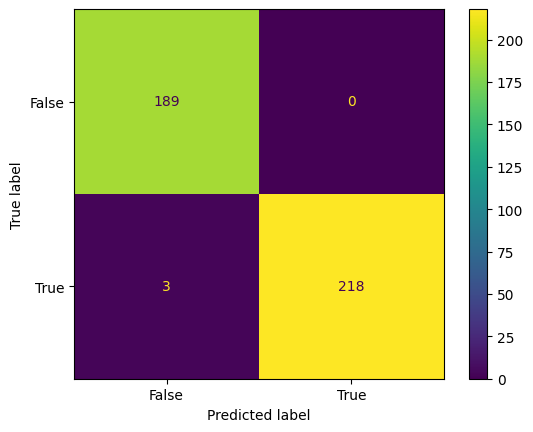

Predicted Target: [1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1
 0 0 0]


In [137]:
np.random.seed(42)
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train, y_train)
y_pred_rfc = model_rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
auc = roc_auc_score(y_test, y_pred_rfc)
confusion_m = confusion_matrix(y_test, y_pred_rfc)
confusion_m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
confusion_m_display.plot()
plt.show()

print("Predicted Target: {}".format(y_pred_rfc))

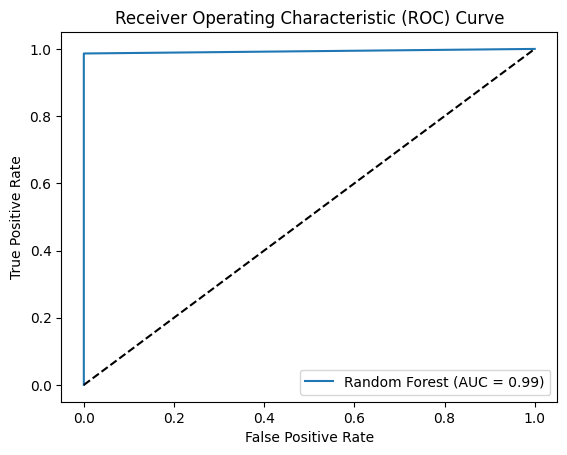

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: ylabel='Count'>

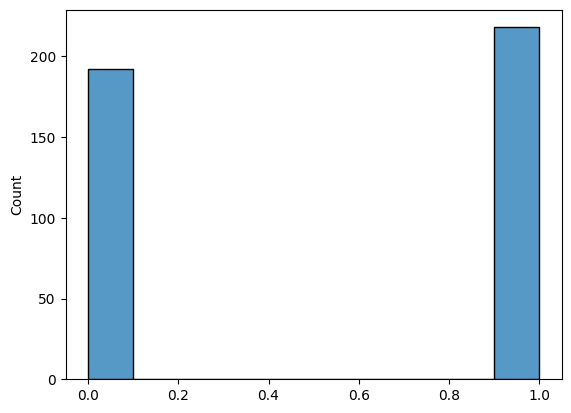

In [139]:
sns.histplot((y_pred_rfc))

Accuracy: 0.8682926829268293
Precision: 0.8326693227091634
Recall: 0.9457013574660633
F1 Score: 0.8855932203389831
AUC: 0.8617395676219205
Confusion Matrix:


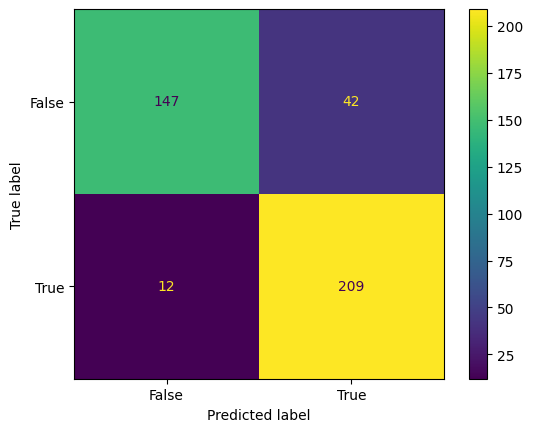

Predicted Target: [1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 1 1]


In [140]:
model_svm = SVC(kernel='linear', C=10)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
auc = roc_auc_score(y_test, y_pred_svm)
confusion_m = confusion_matrix(y_test, y_pred_svm)
confusion_m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
confusion_m_display.plot()
plt.show()

print("Predicted Target: {}".format(y_pred_svm))

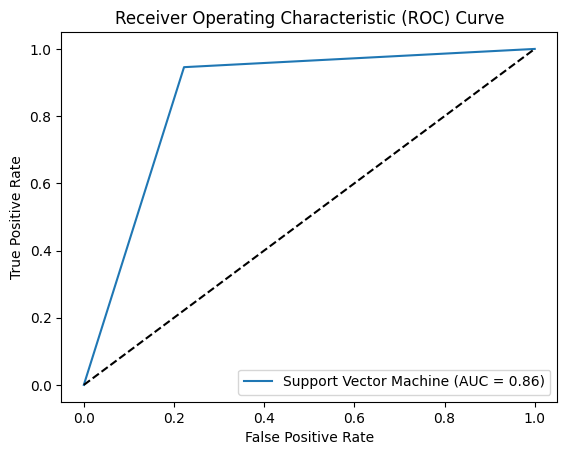

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr, label='Support Vector Machine (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: ylabel='Count'>

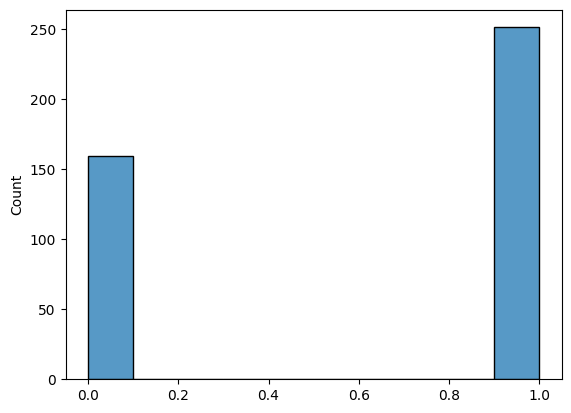

In [142]:
sns.histplot((y_pred_svm))

Accuracy: 0.8585365853658536
Precision: 0.8299595141700404
Recall: 0.9276018099547512
F1 Score: 0.8760683760683761
AUC: 0.8526897938662644
Confusion Matrix:


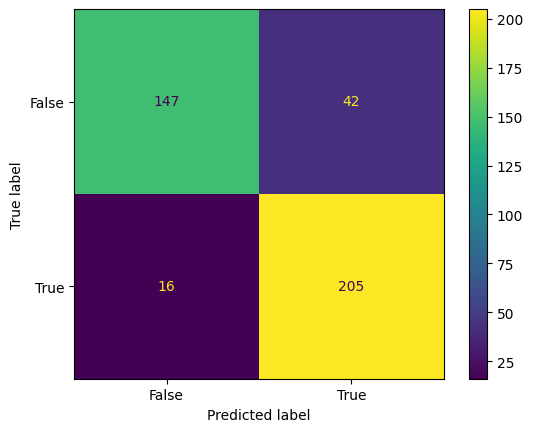

Predicted Target: [1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 1 1]


In [143]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
auc = roc_auc_score(y_test, y_pred_lr)
confusion_m = confusion_matrix(y_test, y_pred_lr)
confusion_m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
confusion_m_display.plot()
plt.show()

print("Predicted Target: {}".format(y_pred_lr))

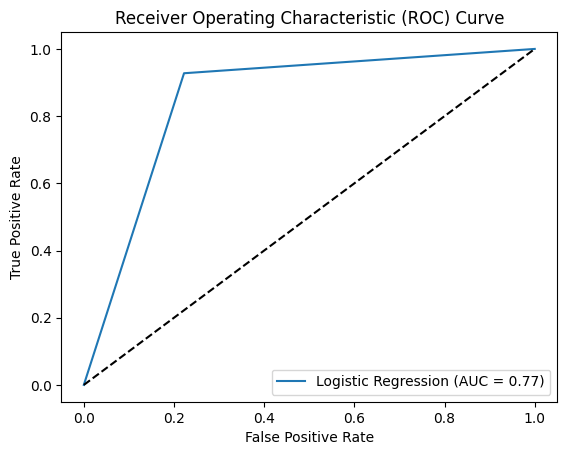

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: ylabel='Count'>

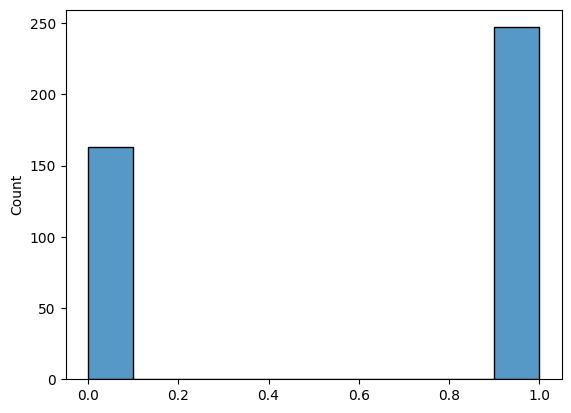

In [145]:
sns.histplot((y_pred_lr))

Accuracy: 0.9682926829268292
Precision: 0.985981308411215
Recall: 0.9547511312217195
F1 Score: 0.9701149425287356
AUC: 0.9694390576743519
Confusion Matrix:


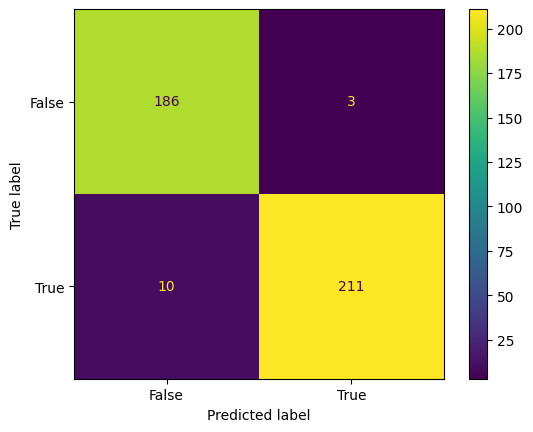

Predicted Target: [1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1
 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1
 0 0 1]


In [146]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
auc = roc_auc_score(y_test, y_pred_dt)
confusion_m = confusion_matrix(y_test, y_pred_dt)
confusion_m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
confusion_m_display.plot()
plt.show()

print("Predicted Target: {}".format(y_pred_dt))

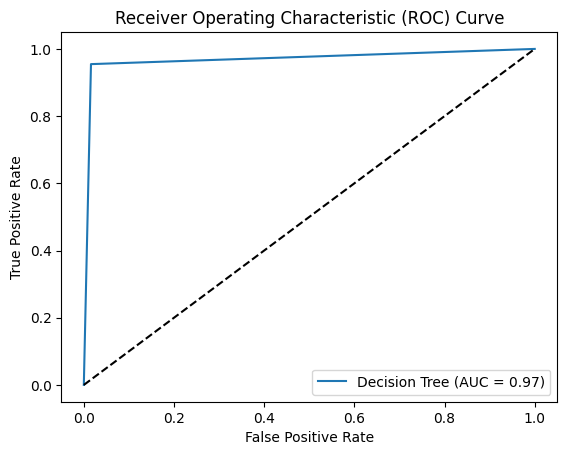

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: ylabel='Count'>

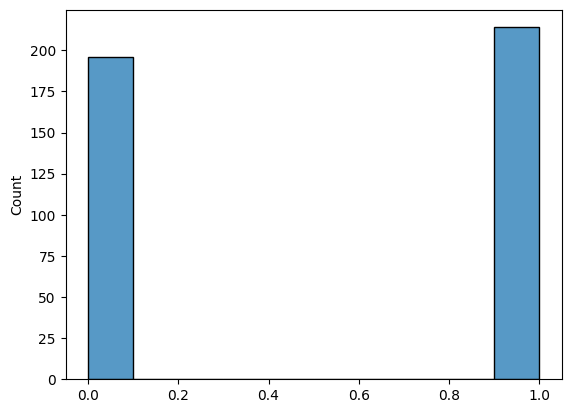

In [148]:
sns.histplot((y_pred_dt))

Accuracy: 0.7682926829268293
Precision: 0.7916666666666666
Recall: 0.7737556561085973
F1 Score: 0.782608695652174
AUC: 0.7678302090066795
Confusion Matrix:


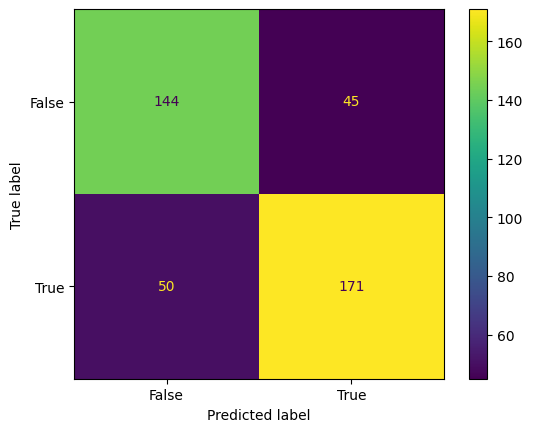

Predicted Target: [1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1
 0 0 0]


In [149]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_pred_knn)
confusion_m = confusion_matrix(y_test, y_pred_knn)
confusion_m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = [False, True])


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
confusion_m_display.plot()
plt.show()

print("Predicted Target: {}".format(y_pred_knn))

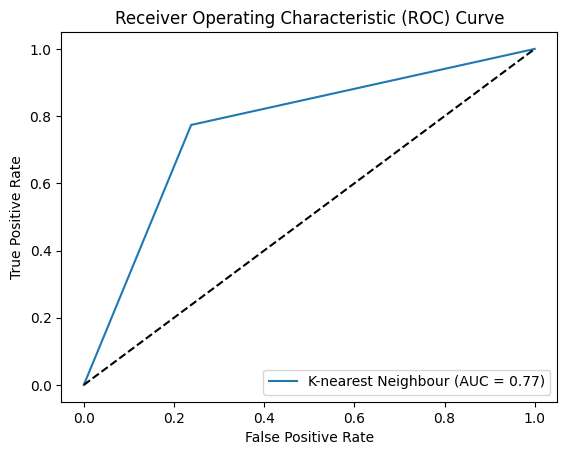

In [150]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, label='K-nearest Neighbour (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Axes: ylabel='Count'>

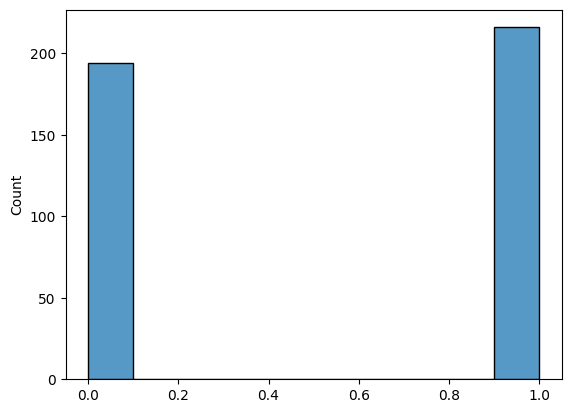

In [151]:
sns.histplot((y_pred_knn))

In [152]:
updated_dataframe = pd.DataFrame({
    "Actual_target": y_test,
    "predicted_target_rfc": y_pred_rfc,
    "predicted_target_svm": y_pred_svm,
    "predicted_target_lr": y_pred_lr,
    "predicted_target_dt": y_pred_dt,
    "predicted_target_knn": y_pred_knn,
    # add additional features as necessary
})
print(updated_dataframe)

#print first 100 rows
updated_dataframe.head(1025)

     Actual_target  predicted_target_rfc  predicted_target_svm  \
960              1                     1                     1   
48               1                     1                     1   
886              0                     0                     0   
981              0                     0                     0   
973              1                     1                     1   
..             ...                   ...                   ...   
420              1                     1                     1   
602              1                     1                     1   
88               0                     0                     0   
27               0                     0                     1   
630              0                     0                     1   

     predicted_target_lr  predicted_target_dt  predicted_target_knn  
960                    1                    1                     1  
48                     1                    1                     0

,Actual_target,predicted_target_rfc,predicted_target_svm,predicted_target_lr,predicted_target_dt,predicted_target_knn
960,1,1,1,1,1,1
48,1,1,1,1,1,0
886,0,0,0,0,0,0
981,0,0,0,0,0,0
973,1,1,1,1,1,1
...,...,...,...,...,...,...
420,1,1,1,1,1,0
602,1,1,1,1,1,1
88,0,0,0,0,0,0
27,0,0,1,1,0,0


In [153]:
#from google.colab import files
#updated_dataframe.to_csv('Updated_cvs_dataset.csv') 
#files.download('Updated_cvs_dataset.csv')